In [111]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

from pyCascade import probePost, physics, utils
from matplotlib import pyplot as plt
import numpy as np
import os
from IPython.core.debugger import set_trace
import pandas as pd

category =  "config1"

############ Universal ################
scratch_home = os.getenv('SCRATCH') #need to set SCRATCH (even if there is no real SCRATCH) to the location where results are written
scratch_dir = f'{scratch_home}/Cascade/city_block_cfd'
home_dir = !pwd
home_dir = home_dir[0]

display(scratch_dir)
display(home_dir)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'/Users/nicholasbachand/Documents/Research/Cascade/city_block_cfd'

'/Users/nicholasbachand/Documents/Research/Cascade/city_block_cfd'

In [112]:
data_dict = {}

for run in range(2, 6):
    run_dict = {}
    for filename in os.listdir(f'{scratch_dir}/CHARLES/{category}/R{run}/tables'):
        if filename.endswith(".csv"):
            filepath = os.path.join(f'{scratch_dir}/CHARLES/{category}/R{run}/tables', filename)
            table_name = os.path.splitext(filename)[0]
            df = pd.read_csv(filepath, index_col=0)
            run_dict[table_name] = df
    data_dict[f'R{run}'] = run_dict

print(data_dict)

{'R2': {'znet':                        comp(u,0)
zwindow_0-0             0.664862
zwindow_0-0_skylights   0.695564
zwindow_0-1             0.248701
zwindow_0-1_skylights   0.312186
zwindow_1-0             0.680283
zwindow_1-0_skylights   0.675928
zwindow_1-1             0.389982
zwindow_1-1_skylights   0.459893
zwindow_2-0             0.644816
zwindow_2-0_skylights   0.684627
zwindow_2-1             0.275080
zwindow_2-1_skylights   0.311966, 'xnet':                        comp(u,0)
xwindow_0-0             0.106345
xwindow_0-0_skylights   0.131838
xwindow_0-1             0.122265
xwindow_0-1_skylights   0.121881, 'zmean':                        comp(u,2)
zwindow_0-0             0.053514
zwindow_0-0_skylights   0.175033
zwindow_0-1            -0.072214
zwindow_0-1_skylights  -0.007391
zwindow_1-0            -0.008458
zwindow_1-0_skylights  -0.008526
zwindow_1-1             0.165886
zwindow_1-1_skylights  -0.250675
zwindow_2-0            -0.033195
zwindow_2-0_skylights   0.005817
zwindow_

2


AttributeError: 'Index' object has no attribute 'set_ylabel'

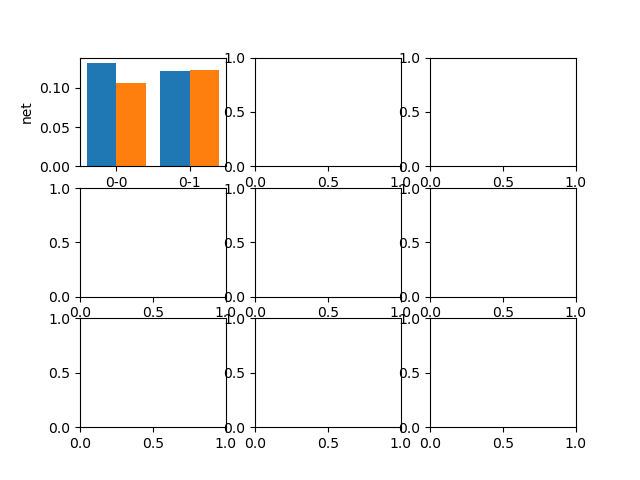

In [115]:
names = np.array([['xnet', 'xmean', 'xrms'], ['znet', 'zmean', 'zrms'], ['ynet', 'ymean', 'yrms']])

for run in range(2, 6):
    print(run)

    fig, axs = plt.subplots(3,3)

    for idx, ax in np.ndenumerate(axs):
        table_name = names[idx]
        df = data_dict[f'R{run}'][table_name]
        no_skylight = []
        skylight = []
        x1 = []
        for name in df.index.values:
            if "_skylight" in name:
                new_name = ""
                for c in name:
                    if c.isdigit():
                        new_name += c
                        if len(new_name) == 2:
                            new_name = f'{new_name[0]}-{new_name[1]}'
                            break
                skylight.append(name)
                x1.append(new_name)
            else:
                no_skylight.append(name)

        x2 = [i + 0.4 for i in range(len(x1))]
        y1 = df.loc[skylight].values.flatten()
        y2 = df.loc[no_skylight].values.flatten()
        ax.bar(x1, y1, width=0.4, label='skylight')
        if len(y2) > 0:
            ax.bar(x2, y2, width=0.4, label='no_skylight')
            ax.set_xticks([i + 0.2 for i in range(len(x1))])
        ax.set_xticklabels(x1)
        ax.set_ylabel(table_name[1:])
        ax.set_ylabel(table_name[0])
        if idx == (0,2):
            ax.legend()
            ax.legend(loc='upper center', bbox_to_anchor=(0.5, 2.2))

    plt.tight_layout()
plt.show()